## The Code Demo
Following is the code example on how we can use PaddleOCR to extract information.

The example includes two sections:<br>
* How to extract text from picture<br>
* How to extract table from picture

## Import Packages

In [1]:
#pip install "paddleocr>=2.0.1"
#pip install paddlepaddle
#pip install -U https://paddleocr.bj.bcebos.com/whl/layoutparser-0.0.0-py3-none-any.whl
import os #folder directory navigation
import cv2 #opencv
from PIL import Image, ImageDraw, ImageFont
from matplotlib import pyplot as plt
from paddleocr import PaddleOCR,draw_ocr,PPStructure,draw_structure_result,save_structure_res

## 1.Extract Text 

### Set Up and Recognition

In [25]:
#set up 
ocr_model = PaddleOCR(use_angle_cls=True, lang='en') # need to run only once to download and load model into memory

[2021/12/13 17:01:30] root WARNING: lang en is not support in PP-OCRv2, auto switch to version PP-OCR
[2021/12/13 17:01:30] root WARNING: lang en is not support in PP-OCRv2, auto switch to version PP-OCR
[2021/12/13 17:01:30] root WARNING: version PP-OCRv2 not support cls models, auto switch to version PP-OCR
Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/Users/yufan/.paddleocr/2.3.0.2/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/Users/yufan/.paddleocr/2.3.0.2/ocr/det/en/en_ppocr_mobile_v2.0_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='box', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, de

In [26]:
img_path = '/Users/yufan/Desktop/check.jpg'
result = ocr_model.ocr(img_path, cls=True)#use ocr_model to perform OCR

[2021/12/13 17:02:22] root DEBUG: dt_boxes num : 26, elapse : 0.40087080001831055
[2021/12/13 17:02:23] root DEBUG: cls num  : 26, elapse : 0.2463548183441162
[2021/12/13 17:02:23] root DEBUG: rec_res num  : 26, elapse : 0.4342842102050781


In [27]:
for line in result:
    print(line)#coordinates+text+F-Score

[[[52.0, 35.0], [203.0, 35.0], [203.0, 56.0], [52.0, 56.0]], ('JOHN SMITH', 0.96981114)]
[[[1000.0, 41.0], [1076.0, 37.0], [1077.0, 68.0], [1001.0, 71.0]], ('1076', 0.9997342)]
[[[55.0, 63.0], [236.0, 63.0], [236.0, 80.0], [55.0, 80.0]], ('123YOURSTREET', 0.9955962)]
[[[52.0, 89.0], [276.0, 89.0], [276.0, 106.0], [52.0, 106.0]], ('ANYTOWN.12345', 0.90298176)]
[[[964.0, 97.0], [1068.0, 95.0], [1069.0, 115.0], [965.0, 118.0]], ('90-7685/3222', 0.9983706)]
[[[647.0, 123.0], [902.0, 123.0], [902.0, 148.0], [647.0, 148.0]], ('March 13, 2018', 0.8787154)]
[[[1049.0, 122.0], [1068.0, 122.0], [1068.0, 136.0], [1049.0, 136.0]], ('05', 0.98050505)]
[[[870.0, 153.0], [916.0, 153.0], [916.0, 170.0], [870.0, 170.0]], ('Date', 0.9969663)]
[[[46.0, 184.0], [165.0, 181.0], [165.0, 205.0], [47.0, 208.0]], ('Pay to the', 0.9419724)]
[[[195.0, 197.0], [403.0, 193.0], [404.0, 224.0], [195.0, 228.0]], ('Tane Dee', 0.88967633)]
[[[841.0, 192.0], [1017.0, 195.0], [1016.0, 229.0], [841.0, 226.0]], ('| $ 100.0

### Visualize Results

In [28]:
# draw result
image = Image.open(img_path).convert('RGB')
# Extract detected components
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]

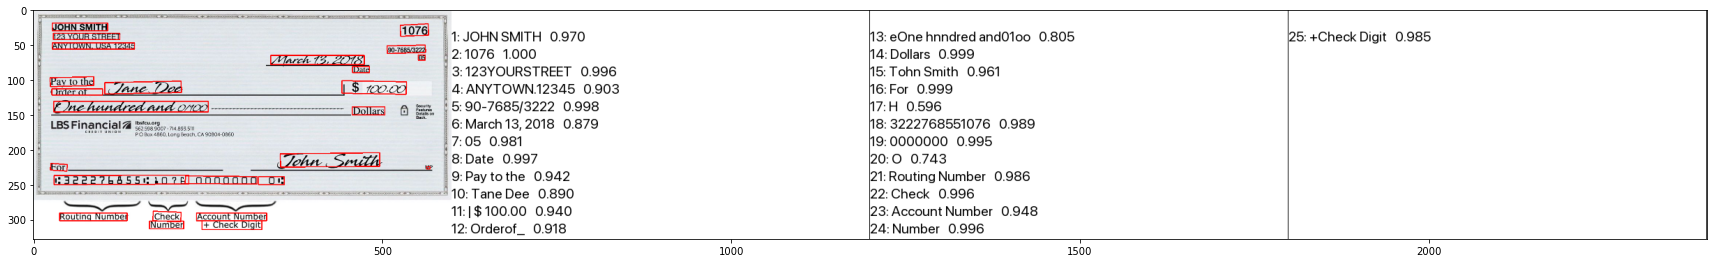

In [29]:
plt.figure(figsize=(30,30))
annotate = draw_ocr(image, boxes, txts, scores, font_path='./fonts/SFNS.ttf')
plt.imshow(annotate)

## 2.Extract Table 

In [32]:
table_engine = PPStructure(show_log=True)
save_folder = '/Users/yufan/Desktop/pic'
img_path = '/Users/yufan/Desktop/table.png'
img = cv2.imread(img_path)
result = table_engine(img)
save_structure_res(result, save_folder,os.path.basename(img_path).split('.')[0])

for line in result:
    line.pop('img')
    print(line)

font_path = '../doc/fonts/chinese.simfang.ttf'
image = Image.open(img_path).convert('RGB')
im_show = draw_structure_result(image, result,font_path=font_path)
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')

Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir=None, cls_thresh=0.9, cpu_threads=10, det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/Users/yufan/.paddleocr/2.3.0.2/ocr/det/ch/ch_PP-OCRv2_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='box', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_polygon=True, e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set='totaltext', enable_mkldnn=False, gpu_mem=500, help='==SUPPRESS==', image_dir=None, ir_optim=True, label_list=['0